## LIBRARY IMPORT 

In [2]:
#!pip install --upgrade xgboost


In [102]:
import xgboost as xgb
import pandas as aju
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,balanced_accuracy_score,roc_auc_score,make_scorer
import warnings

In [4]:
warnings.filterwarnings('ignore')

## DATA IMPORT 

In [6]:
df = aju.read_csv('D:\\PYTHON CODINGS\\MACHINE LEARNING\\ML_00_PROGRAM FILES\\XGBOOST\\01_TELCO_CHURN_PREDICTION\\Telco_customer_churn.csv')

## EDA

In [8]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
df.shape

(7043, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

**The last four columns contain exit interview information and should not be used for predictions**

## REMOVING UNWANTED COLUMNS AND HANDLING MISSING DATA

In [13]:
df1 = df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],axis = 1)

In [14]:
df1.shape

(7043, 29)

In [15]:
df1.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [16]:
df1.Count.unique()

array([1], dtype=int64)

In [17]:
df1.Country.unique()

array(['United States'], dtype=object)

In [18]:
df1.State.unique()

array(['California'], dtype=object)

In [19]:
df1.City.unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [20]:
df2 = df1.drop(['CustomerID','Count','Country','State','Lat Long'],axis = 1)
df2.shape

(7043, 24)

In [21]:
df2.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


**Its ok to have white spaces in City names in City for XGBoost, but we can't have any whitespace if we want to draw a tree**

In [23]:
df2['City'].replace(' ','_',regex = True,inplace = True)

In [24]:
df2.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [25]:
df2.City.value_counts()

City
Los_Angeles       305
San_Diego         150
San_Jose          112
Sacramento        108
San_Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point_Arena         4
Olympic_Valley      4
Name: count, Length: 1129, dtype: int64

In [26]:
df2.columns = df2.columns.str.replace(' ','_')
df2.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [27]:
df2.isnull().sum()

City                 0
Zip_Code             0
Latitude             0
Longitude            0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
dtype: int64

In [28]:
df2.Total_Charges.value_counts()

Total_Charges
20.2      11
          11
19.75      9
19.65      8
20.05      8
          ..
444.75     1
5459.2     1
295.95     1
394.1      1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [29]:
df2[df2.Total_Charges == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


**The Tenure_Month columns have 0 so we replace the Total_Charges with 0**

In [31]:
df2.loc[(df2.Total_Charges == ' '),'Total_Charges'] = 0

In [32]:
df2[df2.Tenure_Months == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


**SUCCESSFULLY REPLACED**

In [34]:
df2.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [35]:
df2['Total_Charges'] = aju.to_numeric(df2['Total_Charges'])

In [36]:
df2.Total_Charges.dtypes

dtype('float64')

**We replace all the whitespaces in all the columns just to draw XGBoost tree**

In [38]:
df2.replace(' ','_',regex = True,inplace = True)
df2.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


## SPLITING X AND Y

In [40]:
x = df2.drop('Churn_Value',axis = 1)
x.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [41]:
y = df2.Churn_Value
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

## ONE HOT ENCODING

In [43]:
x_encoded = aju.get_dummies(x , columns = ['City','Gender','Senior_Citizen',
                                           'Partner','Dependents','Phone_Service',
                                           'Multiple_Lines','Internet_Service','Online_Security',
                                           'Online_Backup','Device_Protection','Tech_Support',
                                           'Streaming_TV','Streaming_Movies','Contract',
                                           'Paperless_Billing','Payment_Method']).astype(int)

In [44]:
x_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33,-118,2,53,108,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34,-118,2,70,151,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34,-118,8,99,820,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34,-118,28,104,3046,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34,-118,49,103,5036,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [45]:
y.unique()

array([1, 0], dtype=int64)

## TRAIN TEST SPLIT

In [47]:
sum(y)/len(y)

0.2653698707936959

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y,stratify = y,random_state = 42)

In [49]:
sum(y_train)/len(y_train)

0.2654297614539947

In [50]:
sum(y_test)/len(y_test)

0.26519023282226006

## MODEL BUILDING

In [98]:
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators = 200,seed=42)
model.fit(
    x_train, y_train,eval_set = [[x_test,y_test]],verbose = True,
)


[0]	validation_0-logloss:0.49803
[1]	validation_0-logloss:0.46332
[2]	validation_0-logloss:0.43942
[3]	validation_0-logloss:0.42600
[4]	validation_0-logloss:0.41727
[5]	validation_0-logloss:0.41028
[6]	validation_0-logloss:0.40756
[7]	validation_0-logloss:0.40494
[8]	validation_0-logloss:0.40352
[9]	validation_0-logloss:0.40349
[10]	validation_0-logloss:0.40322
[11]	validation_0-logloss:0.40315
[12]	validation_0-logloss:0.40218
[13]	validation_0-logloss:0.40233
[14]	validation_0-logloss:0.40293
[15]	validation_0-logloss:0.40303
[16]	validation_0-logloss:0.40374
[17]	validation_0-logloss:0.40388
[18]	validation_0-logloss:0.40385
[19]	validation_0-logloss:0.40454
[20]	validation_0-logloss:0.40651
[21]	validation_0-logloss:0.40803
[22]	validation_0-logloss:0.40833
[23]	validation_0-logloss:0.40823
[24]	validation_0-logloss:0.40841
[25]	validation_0-logloss:0.40891
[26]	validation_0-logloss:0.40984
[27]	validation_0-logloss:0.41060
[28]	validation_0-logloss:0.41083
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

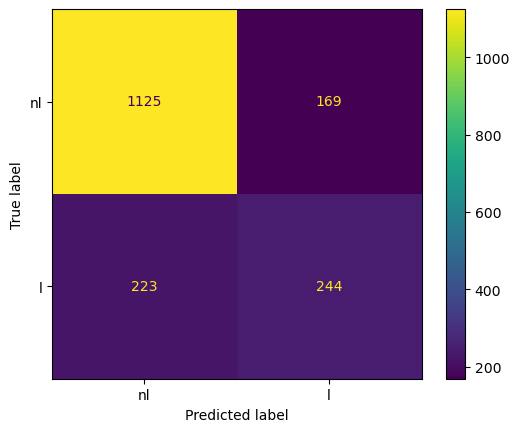

In [104]:
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,display_labels=['nl','l'])

## HYPER PARAMETER TUNING

In [109]:
params = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]
}

In [111]:
optimal_params = GridSearchCV(
    xgb.XGBClassifier(objective='binary:logistic',seed=42,
                      subsample = 0.9,colsample_bytree = 0.5),
    param_grid = params,scoring = 'roc_auc',cv=3)

In [131]:
optimal_params

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc')

In [133]:
optimal_params.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc')

In [135]:
optimal_params.best_params_

{'gamma': 0.25,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 1.0,
 'scale_pos_weight': 1}

In [ ]:
# params = {
#     'max_depth':[4],
#     'learning_rate':[0.1,1,0.5],
#     'gamma':[0.25],
#     'reg_lambda':[100,20,10.0],
#     'scale_pos_weight':[1,3,5]
# }
# optimal_params = GridSearchCV(
#     xgb.XGBClassifier(objective='binary:logistic',seed=42,
#                       subsample = 0.9,colsample_bytree = 0.5),
#     param_grid = params,scoring = 'roc_auc',cv=3)

In [139]:
clf_xg  = xgb.XGBClassifier(objective='binary:logistic',gamma = 0.25,
                            learning_rate = 0.1,max_depth=4,reg_lambda = 10,
                                scale_pos_weight = 3,seed=42,
                      subsample = 0.9,colsample_bytree = 0.5,)


In [143]:
clf_xg.fit(x_train,y_train,eval_set = [(x_test,y_test)])

[0]	validation_0-logloss:0.68283
[1]	validation_0-logloss:0.65527
[2]	validation_0-logloss:0.63321
[3]	validation_0-logloss:0.61477
[4]	validation_0-logloss:0.59775
[5]	validation_0-logloss:0.58352
[6]	validation_0-logloss:0.57022
[7]	validation_0-logloss:0.55903
[8]	validation_0-logloss:0.54971
[9]	validation_0-logloss:0.54178
[10]	validation_0-logloss:0.53404
[11]	validation_0-logloss:0.52676
[12]	validation_0-logloss:0.52143
[13]	validation_0-logloss:0.51788
[14]	validation_0-logloss:0.51272
[15]	validation_0-logloss:0.50874
[16]	validation_0-logloss:0.50537
[17]	validation_0-logloss:0.50330
[18]	validation_0-logloss:0.50065
[19]	validation_0-logloss:0.49789
[20]	validation_0-logloss:0.49496
[21]	validation_0-logloss:0.49269
[22]	validation_0-logloss:0.49088
[23]	validation_0-logloss:0.48915
[24]	validation_0-logloss:0.48809
[25]	validation_0-logloss:0.48638
[26]	validation_0-logloss:0.48550
[27]	validation_0-logloss:0.48425
[28]	validation_0-logloss:0.48290
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

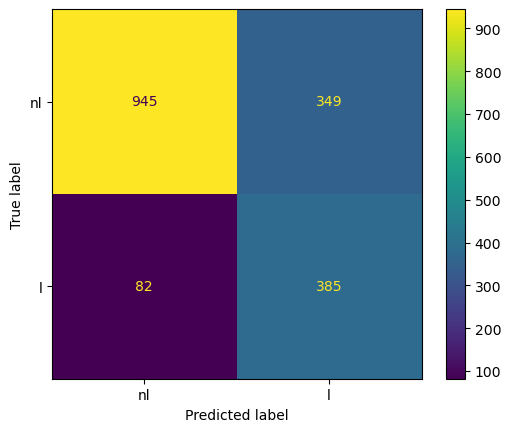

In [145]:
ConfusionMatrixDisplay.from_estimator(clf_xg,x_test,y_test,display_labels=['nl','l'])